# 1. introduction

## 1.1 about dataset

<p>
    This dataset simulates sales transactions for mobile phones and laptops, including product specifications, customer details, and sales information. It contains 50,000 rows of randomly generated data to help analyze product sales trends, customer purchasing behavior, and regional distribution of sales.
</p>
<p>you can download it from <a href="https://www.kaggle.com/datasets/vinothkannaece/mobiles-and-laptop-sales-data">here<a/>. </p>

## 1.2 what are we going to do?

<p>we are going to do some analysis and then use some MachineLearning models on it.</p>

# 2. understand dataset

## 2.1 import needed libraries

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

## 2.2 read dataset

In [247]:
df = pd.read_csv("./mobile_sales_data.csv")

## 2.3 get shape and columns name

In [248]:
df.shape

(50000, 16)

In [249]:
df.columns

Index(['Product', 'Brand', 'Product Code', 'Product Specification', 'Price',
       'Inward Date', 'Dispatch Date', 'Quantity Sold', 'Customer Name',
       'Customer Location', 'Region', 'Core Specification',
       'Processor Specification', 'RAM', 'ROM', 'SSD'],
      dtype='object')

## 2.4 rename columns

In [250]:
df = df.rename(columns={
    'Product': 'product_name',
    'Brand': 'brand_name',
    'Product Code': 'product_id',
    'Product Specification': 'product_specs',
    'Price': 'price',
    'Inward Date': 'received_date',
    'Dispatch Date': 'shipped_date',
    'Quantity Sold': 'units_sold',
    'Customer Name': 'customer_name',
    'Customer Location': 'customer_city',
    'Region': 'sales_region',
    'Core Specification': 'core_specs',
    'Processor Specification': 'processor_details',
    'RAM': 'ram_size_GB',
    'ROM': 'rom_size_GB',
    'SSD': 'ssd_size_GB'
})
df.head(n=3)

,product_name,brand_name,product_id,product_specs,price,received_date,shipped_date,units_sold,customer_name,customer_city,sales_region,core_specs,processor_details,ram_size_GB,rom_size_GB,ssd_size_GB
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN


## 2.5 get info about features

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_name       50000 non-null  object
 1   brand_name         50000 non-null  object
 2   product_id         50000 non-null  object
 3   product_specs      50000 non-null  object
 4   price              50000 non-null  int64 
 5   received_date      50000 non-null  object
 6   shipped_date       50000 non-null  object
 7   units_sold         50000 non-null  int64 
 8   customer_name      50000 non-null  object
 9   customer_city      50000 non-null  object
 10  sales_region       50000 non-null  object
 11  core_specs         25017 non-null  object
 12  processor_details  50000 non-null  object
 13  ram_size_GB        50000 non-null  object
 14  rom_size_GB        50000 non-null  object
 15  ssd_size_GB        25017 non-null  object
dtypes: int64(2), object(14)
memory usage: 6.

## 2.6 final analysis

1. **dataset**:
   - we've got 50000 rows and 16 columns.
   - currently only *price* and *units_sold* are numerical.
   - we have a regression task!

2. **about features (as what it's owner state)**:
    - *product_name*: Type of product (Mobile Phone / Laptop).
    - *brand_name*: Various brands like Apple, Samsung, Dell, Lenovo, OnePlus, etc.
    - *product_id*: Unique identifier for each product.
    - *product_specs*: Brief description of the product features.
    - *price*: Cost of the product (randomly generated).
    - *received_date*: Date when the product was received in stock.
    - *shipped_date*: Date when the product was sold/dispatched.
    - *units_sold*: Number of units sold per transaction.
    - *customer_name*: Randomly generated customer names.
    - *customer_city*: City of the customer.
    - *sales_region*: Sales region (North, South, East, West, Central).
    - *core_specs* (For Laptops): Includes processor models like i3, i5, i7, i9, Ryzen 3-9.
    - *processor_details* (For Mobiles): Includes processors like Snapdragon, Exynos, Apple A-Series, and MediaTek Dimensity.
    - *ram_size*: Randomly assigned memory sizes (4GB to 32GB).
    - *rom_size*: Storage capacity (64GB to 1TB).
    - *ssd_size* (For Laptops): Additional storage (256GB to 2TB), "N/A" for mobile phones.

## 2.7 analysing categorical features

In [252]:
df.nunique()

product_name             2
brand_name              20
product_id           50000
product_specs        50000
price                44112
received_date          731
shipped_date           788
units_sold              10
customer_name        40013
customer_city        25147
sales_region             5
core_specs               8
processor_details       15
ram_size_GB              6
rom_size_GB              5
ssd_size_GB              4
dtype: int64

## 2.8 getting all features unique values

In [253]:
def get_categorical_features(dataFrame):
    categorical_features = []
    for i in dataFrame:
        if not pd.api.types.is_numeric_dtype(dataFrame[i].dtypes):
            categorical_features.append(i)
    return categorical_features

In [254]:
# save features name
categorical_features = get_categorical_features(df)
categorical_features

['product_name',
 'brand_name',
 'product_id',
 'product_specs',
 'received_date',
 'shipped_date',
 'customer_name',
 'customer_city',
 'sales_region',
 'core_specs',
 'processor_details',
 'ram_size_GB',
 'rom_size_GB',
 'ssd_size_GB']

In [255]:
def get_categorical_unique(name:str, dataFrame:pd.DataFrame):
    print("#"*10, name, "#"*10)
    print(pd.DataFrame(dataFrame[name].unique(), columns=["unique values"]), end="\n\n\n")

In [256]:
for n in categorical_features:
    get_categorical_unique(n, df)

########## product_name ##########
  unique values
0  Mobile Phone
1        Laptop


########## brand_name ##########
   unique values
0       Motorola
1           Oppo
2        Samsung
3           Sony
4      Microsoft
5             HP
6           Dell
7          Apple
8        Toshiba
9         Realme
10         Nokia
11        Lenovo
12        Google
13          Acer
14          iQOO
15         Redmi
16          Asus
17          Vivo
18       OnePlus
19        Huawei


########## product_id ##########
      unique values
0          88EB4558
1          416DFEEB
2          9F975B08
3          73D2A7CC
4          CCE0B80D
...             ...
49995      8C187637
49996      0DA9E4D3
49997      CAD89A93
49998      78566C17
49999      9C3FC57C

[50000 rows x 1 columns]


########## product_specs ##########
                                           unique values
0      Site candidate activity company there bit insi...
1                Beat put care fight affect address his.
2              

## 2.9 final analysis

we need to delete some features like *product_id*, *product_specs*, *processor_details* ...
<br />
and we'll also turn some of them in numerical type like *ram_size*, *ssd_size* ...
<br />
i think we do need *customer_city* column for better predict, but i dont have powerfull system for handel it in future so i'll drop it.

## 2.10 check for null values

In [257]:
df.isna().sum()

product_name             0
brand_name               0
product_id               0
product_specs            0
price                    0
received_date            0
shipped_date             0
units_sold               0
customer_name            0
customer_city            0
sales_region             0
core_specs           24983
processor_details        0
ram_size_GB              0
rom_size_GB              0
ssd_size_GB          24983
dtype: int64

## 2.11 result

*ssd_size* is null for 24983 datas!! why? we have 24983 phones and mobile phones have no ssd ...
<br />
*core_specs* again we have 24983 phones so feature core_specs is null for them.

# 3. feature engineering

## 3.1 process date feature

In the world of technology the date of purchase is important, we split *shipped_date* to the three columns *year*, *month*, and *day*, so it may help the ml model to learn better.

In [258]:
def get_years(dateColumn: list[str]) -> np.ndarray:
    dates = []
    for i in range(len(dateColumn)):
        year = int(dateColumn[i][:4])
        dates.append(year)
    return np.array(dates, dtype=int)

def get_months(dateColumn: list[str]) -> np.ndarray:
    dates = []
    for i in range(len(dateColumn)):
        month = int(dateColumn[i][5:7])
        dates.append(month)
    return np.array(dates, dtype=int)

def get_days(dateColumn: list[str]) -> np.ndarray:
    dates = []
    for i in range(len(dateColumn)):
        month = int(dateColumn[i][8:])
        dates.append(month)
    return np.array(dates, dtype=int)

In [259]:
df['shipped_year'] = get_years(df['shipped_date'])
df['shipped_month'] = get_months(df['shipped_date'])
df['shipped_day'] = get_days(df['shipped_date'])

In [260]:
df.head(n=3)

,product_name,brand_name,product_id,product_specs,price,received_date,shipped_date,units_sold,customer_name,customer_city,sales_region,core_specs,processor_details,ram_size_GB,rom_size_GB,ssd_size_GB,shipped_year,shipped_month,shipped_day
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN,2023,8,3
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB,2023,10,6
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN,2025,3,20


## 3.2 delete useless features

In [261]:
# note: if i dont drop customer_city, in one-hot-encoding process it'll full my system RAM
df.drop(columns=['product_id', 'product_specs', 'customer_name', 'processor_details', 'received_date', 'shipped_date', 'customer_city'], inplace=True)

## 3.3 turn ram_size, rom_size and ssd_size into numerical

In [262]:
def turn_device_storage_to_numerical(parts: list[str]) -> np.ndarray:
    numerical_parts = []
    for i in range(len(parts)):
        if pd.isna(parts[i]):
            numerical_parts.append(0)
        else:
            n = float(parts[i][:-2])
            numerical_parts.append(n)
    return np.array(numerical_parts, dtype=float)

In [263]:
df['ram_size_GB'] = turn_device_storage_to_numerical(df['ram_size_GB'])
df['rom_size_GB'] = turn_device_storage_to_numerical(df['rom_size_GB'])
df['ssd_size_GB'] = turn_device_storage_to_numerical(df['ssd_size_GB'])

## 3.4 fill nan 'core_specs' with 'mobile'

In [264]:
df['core_specs'] = df['core_specs'].fillna(value="mobile")

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   50000 non-null  object 
 1   brand_name     50000 non-null  object 
 2   price          50000 non-null  int64  
 3   units_sold     50000 non-null  int64  
 4   sales_region   50000 non-null  object 
 5   core_specs     50000 non-null  object 
 6   ram_size_GB    50000 non-null  float64
 7   rom_size_GB    50000 non-null  float64
 8   ssd_size_GB    50000 non-null  float64
 9   shipped_year   50000 non-null  int64  
 10  shipped_month  50000 non-null  int64  
 11  shipped_day    50000 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 4.6+ MB


In [266]:
df.head()

,product_name,brand_name,price,units_sold,sales_region,core_specs,ram_size_GB,rom_size_GB,ssd_size_GB,shipped_year,shipped_month,shipped_day
0,Mobile Phone,Motorola,78570,6,Central,mobile,12.0,128.0,0.0,2023,8,3
1,Laptop,Oppo,44613,1,South,Ryzen 5,8.0,512.0,256.0,2023,10,6
2,Mobile Phone,Samsung,159826,5,Central,mobile,8.0,256.0,0.0,2025,3,20
3,Laptop,Sony,20911,1,South,i7,12.0,64.0,2.0,2024,3,27
4,Laptop,Microsoft,69832,4,East,i7,8.0,128.0,2.0,2023,9,10


# 4. plot dateset

In [267]:
df.head()

,product_name,brand_name,price,units_sold,sales_region,core_specs,ram_size_GB,rom_size_GB,ssd_size_GB,shipped_year,shipped_month,shipped_day
0,Mobile Phone,Motorola,78570,6,Central,mobile,12.0,128.0,0.0,2023,8,3
1,Laptop,Oppo,44613,1,South,Ryzen 5,8.0,512.0,256.0,2023,10,6
2,Mobile Phone,Samsung,159826,5,Central,mobile,8.0,256.0,0.0,2025,3,20
3,Laptop,Sony,20911,1,South,i7,12.0,64.0,2.0,2024,3,27
4,Laptop,Microsoft,69832,4,East,i7,8.0,128.0,2.0,2023,9,10


## 4.1 most saled brand

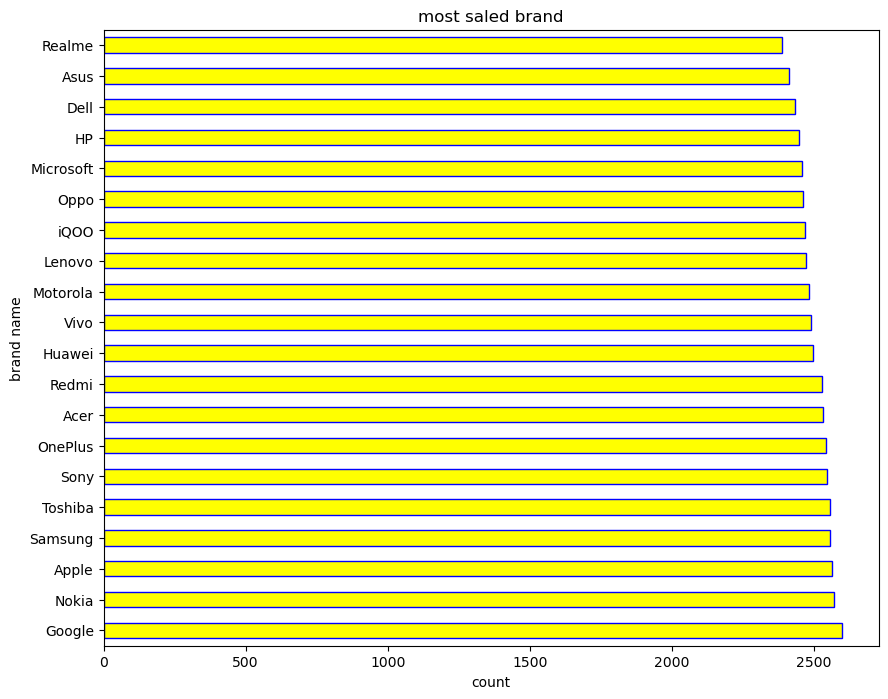

In [268]:
plt.figure(figsize=(10, 8))
brand_count = df['brand_name'].value_counts()
brand_count.plot(kind="barh", color='yellow', edgecolor='blue')
plt.xlabel(xlabel="count")
plt.ylabel(ylabel="brand name")
plt.title(label="most saled brand")
plt.show()

## 4.2 Which brand made the most money?

<Figure size 1000x800 with 0 Axes>

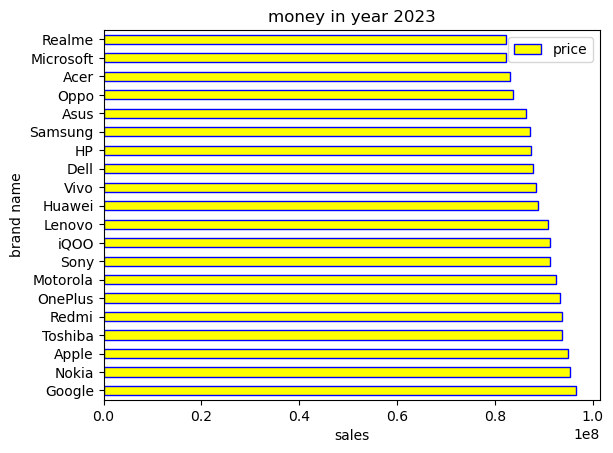

<Figure size 1000x800 with 0 Axes>

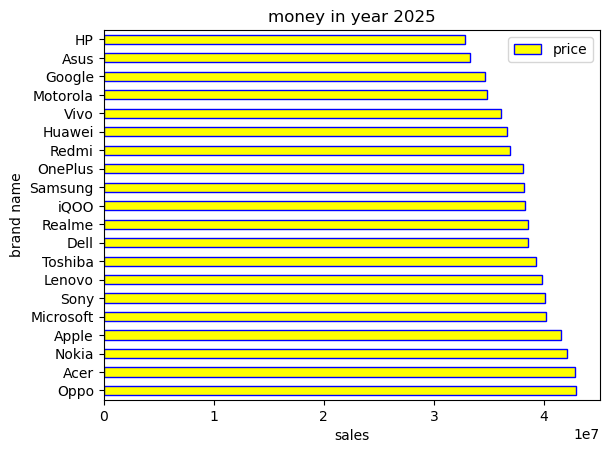

<Figure size 1000x800 with 0 Axes>

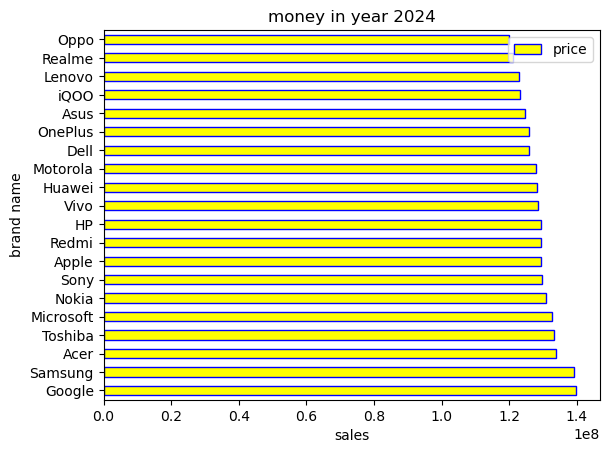

In [269]:
years = df['shipped_year'].unique()
for y in years:
    l = pd.DataFrame(df.query(f'shipped_year == {y}').groupby(['brand_name']).sum()['price']).sort_values(by='price',ascending=False)
    plt.figure(figsize=(10, 8))
    l.plot(kind="barh", color='yellow', edgecolor='blue')
    plt.xlabel(xlabel="sales")
    plt.ylabel(ylabel="brand name")
    plt.title(label=f"money in year {y}")
    plt.show()

# is dataset suitable for ML?

In [271]:
df.corr(numeric_only=True)

,price,units_sold,ram_size_GB,rom_size_GB,ssd_size_GB,shipped_year,shipped_month,shipped_day
price,1.000000,-0.002220,-0.000378,0.000896,0.001428,0.000533,0.008261,-0.000035
units_sold,-0.002220,1.000000,-0.002849,0.006606,0.000430,0.005830,-0.004941,0.005176
ram_size_GB,-0.000378,-0.002849,1.000000,-0.000608,-0.000733,0.004633,0.000583,0.002878
rom_size_GB,0.000896,0.006606,-0.000608,1.000000,0.004588,0.001843,-0.002367,-0.007949
ssd_size_GB,0.001428,0.000430,-0.000733,0.004588,1.000000,0.000354,-0.000734,-0.001651
shipped_year,0.000533,0.005830,0.004633,0.001843,0.000354,1.000000,-0.532661,-0.044477
shipped_month,0.008261,-0.004941,0.000583,-0.002367,-0.000734,-0.532661,1.000000,0.009863
shipped_day,-0.000035,0.005176,0.002878,-0.007949,-0.001651,-0.044477,0.009863,1.000000


as i can see there is no strong relationships between important features such as price with ram_size_GB.
<br />
so i chose for not using this dataset for creating models.